In [2]:
# -*- coding: utf-8 -*-
import torch
import math
import torch.optim as optim
import numpy as np
import matplotlib.pyplot as plt

# Introducció

Avui començarem a fer feina amb **Pytorch**, ja que la segona part del curs tracta de xarxes neuronals profundes. Aquesta és una biblioteca de programari de codi obert dins l'àmbit d'aprenentatge automàtic, esta escrita en _Python_, _C++_ i _CUDA_, i basada en la biblioteca del programari _Torch_ del llenguatge _LUA_. 
**PyTorch** va ser desenvolupada inicialment pel departament d'intel·ligència artificial de l'empresa Facebook i el llenguatge de programació probabilística de l'empresa Uber.

## Problema 

El problema que volem resoldre és l'aproximació de la funció sinus per mitjà d'un polinòmi de grau 3, es a dir cercam els coeficients $a$, $b$, $c$ i $d$ de la següent eqüació: $ y = a + bx + cx^2 + dx^3$ .  Com podem imaginar aquest  és un problema de regressió.

 Aquest és un problema extremadament senzill i ens permetrà coneixer l'estructura bàsica d'una xarxa emprant **Pytorch**.


## Generació de les dades

Les dades que necessitarem seràn els valors d'entrenament, en concret, generarem 2000 mostres que comprendran valors de $x$, $x^2$ i $x^3$ entre $-\Pi$ i $\Pi$ i els respectius valors de la funció sinus.


In [3]:
# Create Tensors to hold input and outputs.
x = torch.linspace(-math.pi, math.pi, 2000)
y = torch.sin(x)
# For this example, the output y is a linear function of (x, x^2, x^3), so
# we can consider it as a linear layer neural network. Let's prepare the
# tensor (x, x^2, x^3).
p = torch.tensor([1, 2, 3])
xx = x.unsqueeze(-1).pow(p)

print(xx.shape)
print(y.shape)

torch.Size([2000, 3])
torch.Size([2000])


## Definició de la xarxa

A més de la xarxa també definirem els paràmetres de l'entrenament

In [19]:
# Use the nn package to define our model as a sequence of layers. nn.Sequential
# is a Module which contains other Modules, and applies them in sequence to
# produce its output. The Linear Module computes output from input using a
# linear function, and holds internal Tensors for its weight and bias.
# The Flatten layer flatens the output of the linear layer to a 1D tensor,
# to match the shape of `y`.

model = torch.nn.Sequential(
    torch.nn.Linear(3, 1),
    torch.nn.Flatten(0, 1))

# The nn package also contains definitions of popular loss functions; in this
# case we will use Mean Squared Error (MSE) as our loss function.
loss_fn = torch.nn.MSELoss(reduction='sum')

learning_rate =  1e-6
optimizer = optim.SGD(model.parameters(), lr=learning_rate)


## Entrenament

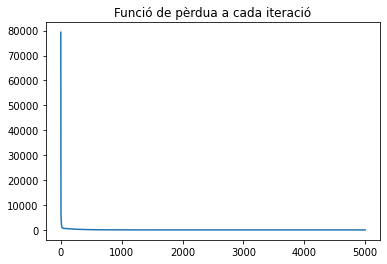

Funció estimada
  y = 5.8798952522920445e-05 + 0.856713056564331 x + -1.0143238796445075e-05 x^2 + -0.09332643449306488 x^3


In [20]:
iter = 5000
loss_p = np.zeros((iter))


for t in range(iter):

    # Forward pass: compute predicted y by passing x to the model. Module objects
    # override the __call__ operator so you can call them like functions. When
    # doing so you pass a Tensor of input data to the Module and it produces
    # a Tensor of output data.
    y_pred = model(xx)

    # Compute and print loss. We pass Tensors containing the predicted and true
    # values of y, and the loss function returns a Tensor containing the
    # loss.
    loss = loss_fn(y_pred, y)
    loss_p[t] = loss.item()
    
    # Zero the gradients before running the backward pass.
    model.zero_grad()

    # Backward pass: compute gradient of the loss with respect to all the learnable
    # parameters of the model. Internally, the parameters of each Module are stored
    # in Tensors with requires_grad=True, so this call will compute gradients for
    # all learnable parameters in the model.
    loss.backward()

    # Update the weights using gradient descent. Each parameter is a Tensor, so
    # we can access its gradients like we did before.
    with torch.no_grad():
        for param in model.parameters():
            param -= learning_rate * param.grad
    #   optimizer.step()  

# You can access the first layer of `model` like accessing the first item of a list
linear_layer = model[0]

plt.title("Funció de pèrdua a cada iteració")
plt.plot(loss_p)
plt.show()

# For linear layer, its parameters are stored as `weight` and `bias`.
print("Funció estimada")
print(f'  y = {linear_layer.bias.item()} + {linear_layer.weight[:, 0].item()} x + {linear_layer.weight[:, 1].item()} x^2 + {linear_layer.weight[:, 2].item()} x^3')

## Mostram els resultats del nostre aprenentatge

Realitzam la predicció en el rang d'entrenament i dibuixam el resultat (vermell) _versus_ la funció original (verd).


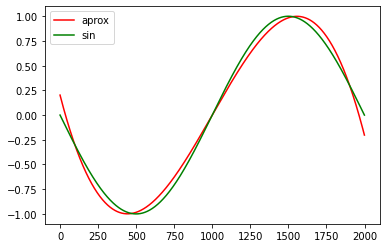

In [21]:
res = np.zeros((2000))

llw = linear_layer.weight[:, :]
for i, v in enumerate(x):

  res[i] = linear_layer.bias.item() + (llw[:, 0].item() * v) + (llw[:, 1].item() * v**2) + (llw[:, 2].item() *  v**3)

plt.title("")
plt.plot(res, color="red", label="aprox")
plt.plot(y, color="green", label="sin")
plt.legend()
plt.show()